# Multivariate Regression Analysis of NLSY97 Data

Data is sourced from the NLSY97(https://www.bls.gov/nls/nlsy97.htm), a representative national database of individuals born in the early 1980s in the United States. Below are some variables we will use:

- educ: number of years of education completed
- Annual_Income: annual income that these individuals earned as adults
- TotalWeeksExp: Total weeks of work experience of the individual
- gender: denotes the gender of the individual
- minority: 1 if the individual belongs to a minority group, 0 otherwise.
- m_college: 1 if the individual’s mother has a college degree, 0 otherwise.
- family income: Annual family income when these individuals were teenagers, reported in thousands.
- gpain8: GPA in 8th grade.
- retention: 1 if the individual was required to repeat a grade during middle school, 0 otherwise.
Columns of scores from the AFQT test. The values are measured as standard deviations from the mean. A value of '0' means the individual earned the average score. A value of '-1' means the indivial earned a score one standard deviation below the average.

- asvabAR: skills in arithmetic reasoning
- asvabMK: skills in mathematical knowledge
- asvabPC: skills in paragraph comprehension
- asvabWK: skills in word knowledge
- AFQT: average of the above 4 scores

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels as sm
import statsmodels.formula.api as smf
NLSY97 = pd.read_excel('NLSY97_PS4.xlsx')
NLSY97.head()

,PUBID - YTH ID CODE 1997,educ,GPA grade 8,School Retention,annual_income,TotalWeeksExp,Black,Hispanic,White,m_college,minority,gender,asvabAR,asvabMK,asvabPC,asvabWK,AFQT
0,1,16.0,3.0,0.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,female,0.066,0.707,-0.507,-0.772,-0.1265
1,2,14.0,3.5,0.0,115000.0,965.0,0.0,1.0,0.0,0.0,1.0,male,-0.238,0.259,1.080,-0.059,0.2605
2,3,14.0,3.0,0.0,NaN,776.0,0.0,1.0,0.0,0.0,1.0,female,-1.009,-0.415,0.299,-0.703,-0.4570
3,4,12.0,4.0,0.0,45000.0,1008.0,0.0,1.0,0.0,0.0,1.0,female,-0.598,0.646,-0.236,-0.542,-0.1825
4,5,12.0,2.5,0.0,150000.0,890.0,0.0,1.0,0.0,0.0,1.0,male,NaN,NaN,NaN,NaN,NaN


In [22]:
print('Data types appear as expected. All numeric variables are integers or floats, while gender is set as an object that denotes individuals gender.')
print(NLSY97.info(24))


Data types appear as expected. All numeric variables are integers or floats, while gender is set as an object that denotes individuals gender.
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8984 entries, 0 to 8983
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PUBID - YTH ID CODE 1997  8984 non-null   int64  
 1   educ                      8151 non-null   float64
 2   GPA grade 8               8601 non-null   float64
 3   School Retention          8969 non-null   float64
 4   annual_income             5170 non-null   float64
 5   TotalWeeksExp             8030 non-null   float64
 6   Black                     8649 non-null   float64
 7   Hispanic                  8649 non-null   float64
 8   White                     8649 non-null   float64
 9   m_college                 8290 non-null   float64
 10  minority                  8649 non-null   float64
 11  gender                    8984

Histogram of the variable AFQT shows normal distribution.


array([<Axes: title={'center': 'AFQT'}>], dtype=object)

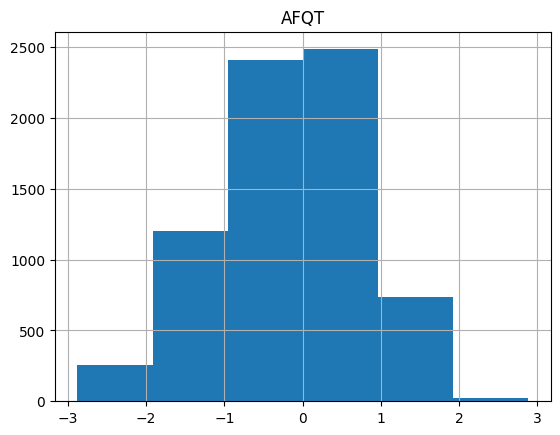

In [23]:
print('Histogram of the variable AFQT shows normal distribution.')
fig, ax = plt.subplots()
NLSY97.hist(column = 'AFQT', bins = 6, ax=ax)

In [24]:
print('Created new variable called exper, that transforms the variable TotalWeeksExp into years of experience by adding 1/7(removes 0 week entries) to TotalWeeksExx and dividing by 52.14')
NLSY97['exper'] = (NLSY97['TotalWeeksExp'] + 1)/52.14

Created new variable called exper, that transforms the variable TotalWeeksExp into years of experience by adding 1/7(removes 0 week entries) to TotalWeeksExx and dividing by 52.14


In [32]:
print('Created new variable in the dataframe called female that takes on value of 1 if the individual is female and 0 otherwire')
NLSY97['female'] = (NLSY97['gender'] == 'female').astype(int)

Created new variable in the dataframe called female that takes on value of 1 if the individual is female and 0 otherwire


In [26]:
print('Performed a multivariate regression analysis with annual_income as the dependent variable and educ, exper, m_college, female, and AFQT as the independent variables.')
Income_NLSY97=smf.ols('annual_income ~ educ + exper + m_college + female + AFQT', data=NLSY97).fit()
print(Income_NLSY97.summary())

Performed a multivariate regression analysis with annual_income as the dependent variable and educ, exper, m_college, female, and AFQT as the independent variables.
                            OLS Regression Results                            
Dep. Variable:          annual_income   R-squared:                       0.185
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     162.3
Date:                Wed, 15 Jan 2025   Prob (F-statistic):          7.92e-156
Time:                        17:49:05   Log-Likelihood:                -44106.
No. Observations:                3570   AIC:                         8.822e+04
Df Residuals:                    3564   BIC:                         8.826e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t  

Regression Interpretation: With P values equal to 0, both education and female gender held statistical significance on the dependent variable. Among those surveyed, and holding all else equal, we predict female individuals earned an annual income that was 25610 dollars less than males and each addtional year of education for males led to a increase of 5274.72 dollars in annual income. 
R squared of .185 reveals that the independent variables selected accounted for 18.5% of the variance in annual income among those surveyed.

In [27]:
print('Regression with only educ as the independent variable.')
educ_income = smf.ols('annual_income ~ educ', data=NLSY97).fit()
print(educ_income.summary())

Regression with only educ as the independent variable.
                            OLS Regression Results                            
Dep. Variable:          annual_income   R-squared:                       0.116
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     657.6
Date:                Wed, 15 Jan 2025   Prob (F-statistic):          2.16e-136
Time:                        17:49:05   Log-Likelihood:                -62076.
No. Observations:                5024   AIC:                         1.242e+05
Df Residuals:                    5022   BIC:                         1.242e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

Regression Interpretation: Including only education as an independent variable, we predict results in an additional year of education increasing annual income by $8082.75. This reveals that independent variables included in our original analysis are contributing to the benefits of education. 


In [28]:
print('Performed a multivariate regression analysis with log of annual_income as the dependent variable and educ, exper, m_college, female, and AFQT as the independent variables.')
logincome = smf.ols('np.log(annual_income) ~ educ + exper + m_college + female + AFQT', data=NLSY97).fit()
print(logincome.summary())

Performed a multivariate regression analysis with log of annual_income as the dependent variable and educ, exper, m_college, female, and AFQT as the independent variables.
                              OLS Regression Results                             
Dep. Variable:     np.log(annual_income)   R-squared:                       0.239
Model:                               OLS   Adj. R-squared:                  0.238
Method:                    Least Squares   F-statistic:                     224.1
Date:                   Wed, 15 Jan 2025   Prob (F-statistic):          1.67e-208
Time:                           17:49:05   Log-Likelihood:                -4526.0
No. Observations:                   3570   AIC:                             9064.
Df Residuals:                       3564   BIC:                             9101.
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
        

Regression Interpretation: The model predicts that each year of experience increases annual income by 5.56% for males, while females earn 44.29% less annual income than males holding all else equal. 

In [29]:
print('Performed a multivariate regression analysis with log of annual_income as the dependent variable and educ, log of exper, m_college, female, and AFQT as the independent variables.')
logresults = smf.ols('np.log(annual_income) ~ educ + np.log(exper) + m_college + female + AFQT', data=NLSY97).fit()
print(logresults.summary())

Performed a multivariate regression analysis with log of annual_income as the dependent variable and educ, log of exper, m_college, female, and AFQT as the independent variables.
                              OLS Regression Results                             
Dep. Variable:     np.log(annual_income)   R-squared:                       0.198
Model:                               OLS   Adj. R-squared:                  0.197
Method:                    Least Squares   F-statistic:                     175.9
Date:                   Wed, 15 Jan 2025   Prob (F-statistic):          1.09e-167
Time:                           17:49:05   Log-Likelihood:                -4620.4
No. Observations:                   3570   AIC:                             9253.
Df Residuals:                       3564   BIC:                             9290.
Df Model:                              5                                         
Covariance Type:               nonrobust                                         
 

Regression Interpretation: The model predicts that a 1% increase in years of experience leads to a .1435% increase in annual income for males.

In [30]:
print('Created a new variable, exper_educ that is equal to the column exper multiplied by the column educ. This will allow us to add an interaction term to our model.')
NLSY97['exper_educ'] = (NLSY97['exper']*NLSY97['educ'])
NLSY97['exper_educ'].head()

Created a new variable, exper_educ that is equal to the column exper multiplied by the column educ. This will allow us to add an interaction term to our model.


0           NaN
1    259.378596
2    208.630610
3    232.220944
4    205.063291
Name: exper_educ, dtype: float64

In [31]:
print('Performed a multivariate regression analysis with log(annual_income) as dependent variabl and independent variables as educ , exper, exper_educ, female, m_college, AFQT.')
interaction = smf.ols('np.log(annual_income) ~ educ + exper + exper_educ + female + m_college + AFQT', data=NLSY97).fit()
print(interaction.summary())

Performed a multivariate regression analysis with log(annual_income) as dependent variabl and independent variables as educ , exper, exper_educ, female, m_college, AFQT.
                              OLS Regression Results                             
Dep. Variable:     np.log(annual_income)   R-squared:                       0.242
Model:                               OLS   Adj. R-squared:                  0.240
Method:                    Least Squares   F-statistic:                     189.1
Date:                   Wed, 15 Jan 2025   Prob (F-statistic):          1.08e-209
Time:                           17:49:05   Log-Likelihood:                -4520.5
No. Observations:                   3570   AIC:                             9055.
Df Residuals:                       3563   BIC:                             9098.
Df Model:                              6                                         
Covariance Type:               nonrobust                                         
          

Regression Interpretation: The model predicts that for each additional year of education, each additional year of experience brings a .52% reduction wages. With a pvalue of .001 exper_educ is statistically significant. This model has the highest R squared of .242, thus it explains more of the variance in annual income than the other models analysed.

Omission of family income, may bring bias to the findings as our models probably ignore influences from affluent working class families, as well as contributions of family wealth on individuals potential for educational attainment, and future potential income. 